In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colormaps as cmaps

In [3]:
def load_df(path):
    df = pd.read_csv(path)
    initial_rows = np.where(df['epoch'] == 0)[0]
    df.drop(index=initial_rows, inplace=True)
    return df

k100_df = load_df("./rep_100_losses_by_epoch.csv")
k250_df = load_df("./rep_250_losses_by_epoch.csv")
k500_df = load_df("./rep_500_losses_by_epoch.csv")
k1000_df = load_df("./rep_1000_losses_by_epoch.csv")
k2500_df = load_df("./rep_2500_losses_by_epoch.csv")
k5000_df = load_df("./rep_5000_losses_by_epoch.csv")

k250_df

,epoch,loss,reconstruction_loss,divergence_loss,test_loss,test_rec,test_div,epochs,batch_size,save_on,...,model_folder,dataset_size,join,refresh_data_on,save_losses_on,test_dataset,test_size,main_folder,losses_file,run
1,1,3470.854580,3442.807295,28.047269,3499.926365,3471.932165,27.994214,32,256,0,...,./data/samples/single_cells/agren_liver_hepato...,65536,inner,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
2,2,3262.908245,3234.926535,27.981733,3343.068625,3315.446270,27.622388,32,256,0,...,./data/samples/single_cells/agren_liver_hepato...,65536,inner,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
3,3,3063.422865,3036.642940,26.779946,3166.227325,3139.340090,26.887255,32,256,0,...,./data/samples/single_cells/agren_liver_hepato...,65536,inner,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
4,4,2797.760320,2768.042695,29.717638,3000.481305,2973.383445,27.097839,32,256,0,...,./data/samples/single_cells/agren_liver_hepato...,65536,inner,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
5,5,2611.359945,2581.161940,30.198005,2933.127385,2906.263035,26.864349,32,256,0,...,./data/samples/single_cells/agren_liver_hepato...,65536,inner,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,27,305.195226,264.719909,40.475317,1811.667389,1781.252723,30.414674,32,256,0,...,./data/samples/single_cells/agren_liver_hepato...,65536,inner,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,9
316,28,297.842276,257.378223,40.464053,1808.900922,1778.551639,30.349282,32,256,0,...,./data/samples/single_cells/agren_liver_hepato...,65536,inner,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,9
317,29,293.663215,253.270467,40.392747,1808.589221,1778.292459,30.296760,32,256,0,...,./data/samples/single_cells/agren_liver_hepato...,65536,inner,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,9
318,30,286.291057,245.929149,40.361909,1806.525428,1776.240308,30.285118,32,256,0,...,./data/samples/single_cells/agren_liver_hepato...,65536,inner,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,9


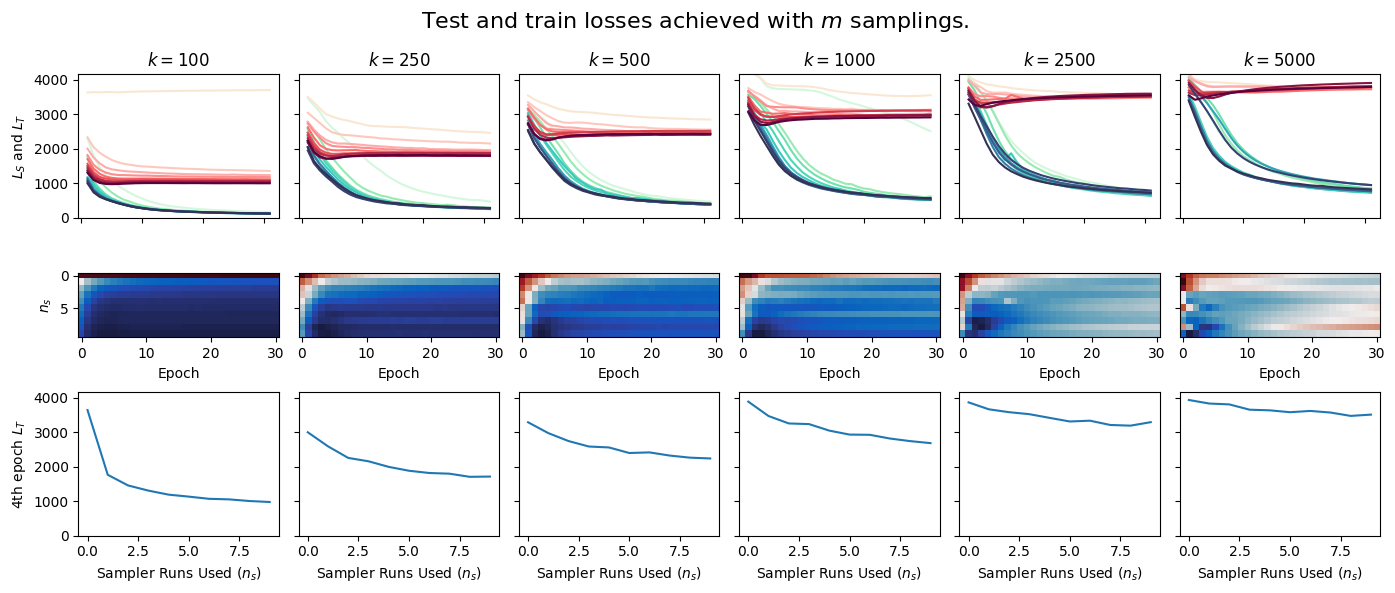

In [5]:
fig, axs = plt.subplots(3, 6, figsize=(14,6))

ax1 = (axs[0,0], axs[1,0], axs[2,0])
ax2 = (axs[0,1], axs[1,1], axs[2,1])
ax3 = (axs[0,2], axs[1,2], axs[2,2])
ax4 = (axs[0,3], axs[1,3], axs[2,3])
ax5 = (axs[0,4], axs[1,4], axs[2,4])
ax6 = (axs[0,5], axs[1,5], axs[2,5])

max_loss = max([
    df["test_loss"].max()
    for df in [k250_df, k500_df, k2500_df, k5000_df]
])

def set_axis(axs):
    axs[0].set_ylabel("$L_S$ and $L_T$")
    axs[1].set_ylabel("$n_{s}$")
    axs[2].set_ylabel(f"4th epoch $L_T$")


def plot(kdf, axs, k, remove_y_ticks=True):
    loss_colors = cmaps.bl_11.discrete(10).colors
    test_colors = list(reversed(cmaps.fushia_red_pink1.discrete(10).colors))

    for run in kdf['run'].unique():
        run_df = kdf[kdf['run'] == run]
        axs[0].plot(run_df['epoch'], run_df["loss"], label=run, color=loss_colors[run])
        axs[0].plot(run_df['epoch'], run_df["test_loss"], label=run, color=test_colors[run])


    axs[0].set_title(f"$k={k}$")
    axs[0].set_ylim([0, max_loss])
    axs[0].tick_params(
        axis='x', 
        labelbottom=False,
    )

    loss_matrix = kdf.set_index(['run', 'epoch'])['test_loss'].unstack().values
    axs[1].imshow(loss_matrix, cmap=cmaps.balance)#, vmin=0, vmax=max_loss)
    axs[1].set_xlabel("Epoch")
    
    epoch4_df = kdf[kdf['epoch'] == 4]
    axs[2].plot(epoch4_df['run'], epoch4_df['test_loss'])
    axs[2].set_ylim([0, max_loss])
    axs[2].set_xlabel("Sampler Runs Used ($n_s$)")

    if remove_y_ticks:
        for ax in axs:
            ax.set_yticklabels([])

plot(k100_df, ax1, 100, remove_y_ticks=False)
plot(k250_df, ax2, 250)
plot(k500_df, ax3, 500)
plot(k1000_df, ax4, 1000)
plot(k2500_df, ax5, 2500)
plot(k5000_df, ax6, 5000)

set_axis(ax1)

fig.suptitle("Test and train losses achieved with $m$ samplings.", fontsize=16)
fig.tight_layout()

plt.savefig("./test_losses.png", dpi=400)
plt.show()